# In Class Notebook, Week 02

You can always paste the URL of this notebook (https://github.com/UIUC-iSchool-DataViz/is445_spring2022/blob/master/week02/inClass_week02.ipynb ) into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

Hi hello, this is me writing stuff.

This is me writing some notes.

# This is a large header

## This is a smaller header

### dinky header

I can also make ordered lists:
1. this is item 1
1. this is item 2
1. this is item3

Unordered lists:
* first thing
* second thing
* third thing

$\frac{x}{y} = \frac{5}{3}$

SHIFT+Return = run the cell

In [1]:
4+5

9

In [2]:
print('hi there')

hi there


In [3]:
'hi there'

'hi there'

# Simple plots

ESC-M to get into this markdown cell

In [5]:
import matplotlib
import matplotlib.pyplot as plt # importing a library with a shorthand
import datetime
import numpy as np # again, another shorthand

In [6]:
time = [20070101, 20070401, 20070701, 20071001, 20080101, 20080401, 20080701, 20081001, 20090101]

In [7]:
time

[20070101,
 20070401,
 20070701,
 20071001,
 20080101,
 20080401,
 20080701,
 20081001,
 20090101]

Text(0, 0.5, 'YearMonthDay')

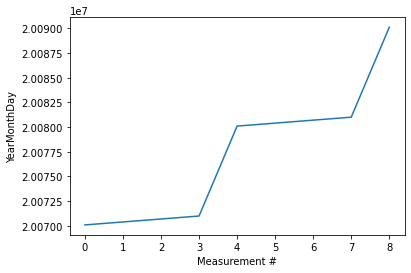

In [10]:
plt.plot(time)
plt.xlabel('Measurement #') # x-axis label
plt.ylabel('YearMonthDay')

In [11]:
gdp = [14233.2, 14422.3, 14569.7, 14685.3, 14668.4, 14813.0, 14843.0, 14549.9, 14383.9]

In [12]:
gdp

[14233.2,
 14422.3,
 14569.7,
 14685.3,
 14668.4,
 14813.0,
 14843.0,
 14549.9,
 14383.9]

Text(0, 0.5, 'GDP in Billions')

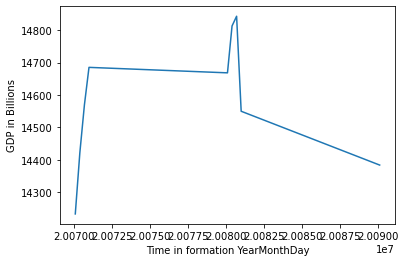

In [13]:
plt.plot(time,gdp) # simple plot, (x,y) values
plt.xlabel('Time in formation YearMonthDay')
plt.ylabel('GDP in Billions')

Text(0, 0.5, 'GDP in Billions')

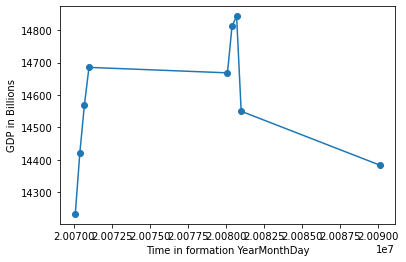

In [14]:
plt.plot(time,gdp, 'o-') # simple plot, (x,y) values
plt.xlabel('Time in formation YearMonthDay')
plt.ylabel('GDP in Billions')

Our x-axis data is a bit of a mess -- it doesn't have the correct formatting for date and time information.

In [15]:
from datetime import datetime

In [17]:
date = []
for t in time: # for each element in time
    #print(t)
    date.append(datetime.strptime(str(t),'%Y%m%d'))
    #%Y means 4 character year
    #%m means 2 character month
    #%d means 2 character day

In [18]:
print(date)

[datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2007, 4, 1, 0, 0), datetime.datetime(2007, 7, 1, 0, 0), datetime.datetime(2007, 10, 1, 0, 0), datetime.datetime(2008, 1, 1, 0, 0), datetime.datetime(2008, 4, 1, 0, 0), datetime.datetime(2008, 7, 1, 0, 0), datetime.datetime(2008, 10, 1, 0, 0), datetime.datetime(2009, 1, 1, 0, 0)]


In [19]:
time

[20070101,
 20070401,
 20070701,
 20071001,
 20080101,
 20080401,
 20080701,
 20081001,
 20090101]

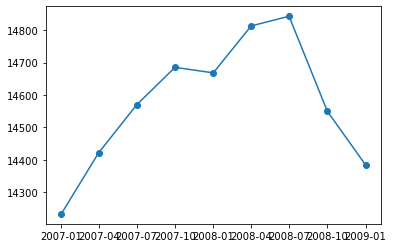

In [20]:
plt.plot(date,gdp,'o-')

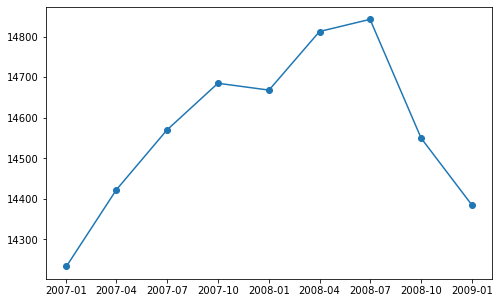

In [27]:
fig, ax = plt.subplots(figsize=(8,5)) # empty plot object

ax.plot(date, gdp, 'o-') # drawing data on a axis object

plt.show()

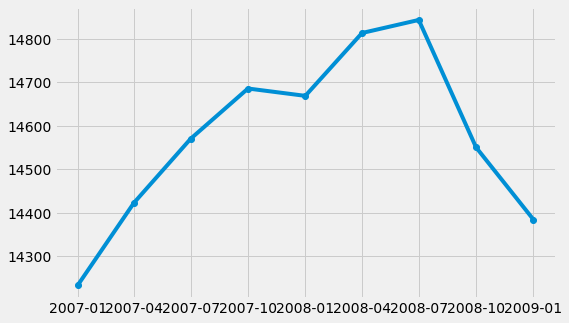

In [28]:
style = 'fivethirtyeight' # make plots in fivethirtyeight style
with plt.style.context(style): # only apply this to the current plot
    fig, ax = plt.subplots(figsize=(8,5)) # empty plot object
    ax.plot(date, gdp, 'o-') # drawing data on a axis object
    plt.show()

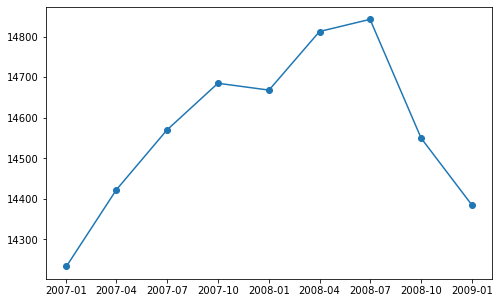

In [29]:
fig, ax = plt.subplots(figsize=(8,5)) # empty plot object

ax.plot(date, gdp, 'o-') # drawing data on a axis object

plt.show()

In [30]:
# into a function
def make_gdp_plot(style):
    with plt.style.context(style): # only apply this to the current plot
        fig, ax = plt.subplots(figsize=(8,5)) # empty plot object
        ax.plot(date, gdp, 'o-') # drawing data on a axis object
        plt.show()
# indents with CMD + ]

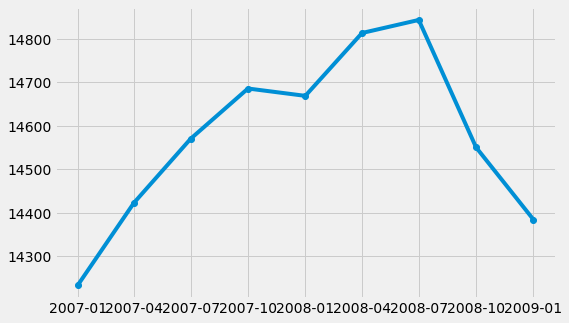

In [31]:
make_gdp_plot('fivethirtyeight')

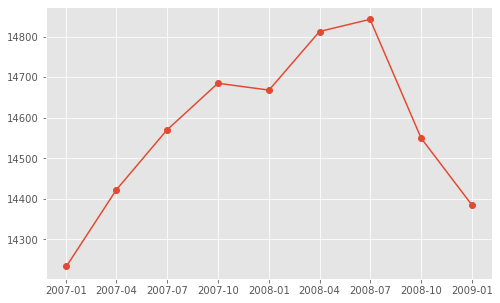

In [32]:
make_gdp_plot('ggplot')

## Reading in some data

In [33]:
from PIL import Image # importing one specific function/module from a library

In [34]:
im = Image.open('/Users/jillnaiman/Downloads/stitch_reworked.png')

In [42]:
!ls /Users/jillnaiman/Downloads/stitch*

/Users/jillnaiman/Downloads/stitch_reworked (1).png
/Users/jillnaiman/Downloads/stitch_reworked (2).png
/Users/jillnaiman/Downloads/stitch_reworked (3).png
/Users/jillnaiman/Downloads/stitch_reworked (4).png
/Users/jillnaiman/Downloads/stitch_reworked (5).png
/Users/jillnaiman/Downloads/stitch_reworked.png


In [44]:
!ls /Users/jillnaiman

AVLdocNLP                              myIdyllPost_OLD
Applications                           mynewpost
Cloud_Finder                           mypost2
DataVizBook                            mypost3
Desktop                                mypost4
Documents                              nltk_data
Downloads                              oldMercurialRepos
Dropbox                                openChampaignProject
EXTRACTIONS                            openvdb
ImageMagick-7.0.9                      opt
Library                                package-list.txt
MegaYolo                               package-list.txt~
MegaYolo_pmcnoncom                     package-lock.json
MegaYolo_scanbank                      package.json
MegaYolo_test                          pdffigures2
Movies                                 pdfminer.six
Music                                  pdfparser
Pictures                               pl-is507aog
Public                                 preprocess_ocr
PulledARImages      

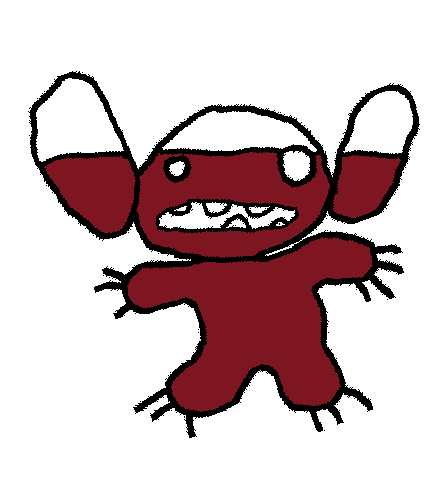

In [35]:
im

In [36]:
type(im)

PIL.PngImagePlugin.PngImageFile

In [37]:
imgdata = np.array(im)

In [39]:
imgdata.shape

(483, 430, 4)

In [40]:
# 483 pixels in the y direction, 430 pixels in the x, 4(?) color channels

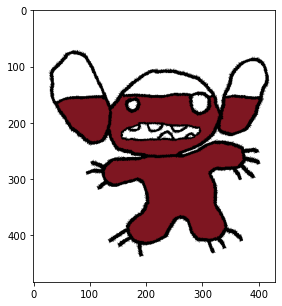

In [41]:
# use matplotlib to show the image DATA
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(imgdata)
plt.show()

In [46]:
np.unique(imgdata)

array([  0,  22,  33, 126, 255], dtype=uint8)

In [47]:
np.unique(imgdata[:,:,0]) # all x/y pixels, but the 0th color channel (Red channel)

array([  0, 126, 255], dtype=uint8)